Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [4]:
# Define the Google Sheets URL components
sheet_id = '1IC8atZW1Y8UbGR1yGKtMwBd-e4v4jVPyY2u2MGcBoUQ'
sheet_gid = '684236481'
csv_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={sheet_gid}'

In [5]:
# Load the data into a DataFrame
data = pd.read_csv(csv_url)

In [6]:
# Display the first few rows of the DataFrame
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


Inspect the Dataset

In [8]:
# Display the columns of the DataFrame
print("Columns in the dataset:")
print(data.columns)

Columns in the dataset:
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [9]:
# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(data.head())


First few rows of the dataset:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [10]:
# Display basic information about the dataset
print("\nBasic information about the dataset:")
print(data.info())


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [11]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


Preprocess the Data

In [13]:
# Convert categorical columns to numeric using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

In [14]:
# Display the columns after one-hot encoding
print("\nColumns after one-hot encoding:")
print(data.columns)


Columns after one-hot encoding:
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_yes'],
      dtype='object')


Separate Features and Target Variable

In [16]:
# Specify the target column
target_column = 'y_yes'  # Target column indicating subscription status

In [17]:
# Check if the target column exists in the DataFrame
if target_column not in data.columns:
    raise KeyError(f"Target column '{target_column}' not found in the dataset. Available columns: {data.columns}")

In [18]:
# Separate features (X) and target variable (y)
X = data.drop(columns=[target_column])  # Drop the target column to get features
y = data[target_column]  # Extract the target column

In [19]:
# Display shapes of features and target
print("\nFeatures shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (45211, 42)
Target shape: (45211,)


Split Data into Training and Testing Sets

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Display shapes of training and testing sets
print("\nTraining set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (31647, 42) (31647,)
Testing set shape: (13564, 42) (13564,)


Standardize the Features

In [24]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Confirm standardization by displaying the mean and standard deviation
print("\nMean of training features after scaling:", np.mean(X_train_scaled, axis=0))
print("Standard deviation of training features after scaling:", np.std(X_train_scaled, axis=0))


Mean of training features after scaling: [ 1.68840060e-16  6.96016204e-18 -6.96016204e-17  8.98085425e-19
  8.36622703e-17  3.83931519e-17 -1.88597939e-17 -1.96456187e-17
  3.99648014e-17 -5.65793817e-17  5.97226807e-17 -3.30046394e-17
 -4.40061858e-17  1.93088366e-17 -4.31081004e-17  4.71494848e-18
 -2.91877763e-17 -7.18468340e-18  1.16302062e-16 -1.79617085e-18
  1.50429309e-16 -5.02927838e-17 -1.03279824e-17 -1.12260678e-18
 -9.78913113e-17 -3.77195878e-17 -8.68897648e-17  3.05349044e-17
  3.95157587e-17  9.87893967e-18  1.89720546e-17  5.38851255e-18
 -3.45762888e-17  6.08452875e-17  3.59234170e-17  3.92912373e-18
 -3.04226438e-17 -3.90667160e-17  3.00858617e-17  6.73564068e-18
 -8.66652435e-17 -9.16047133e-17]
Standard deviation of training features after scaling: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Train the Random Forest Classifier

In [27]:
# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [28]:
# Display model parameters
print("\nRandom Forest model parameters:")
print(model.get_params())


Random Forest model parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


Make Predictions and Evaluate the Model

In [30]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [31]:
# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[11632   334]
 [  973   625]]

Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.97      0.95     11966
        True       0.65      0.39      0.49      1598

    accuracy                           0.90     13564
   macro avg       0.79      0.68      0.72     13564
weighted avg       0.89      0.90      0.89     13564



Plot the Confusion Matrix

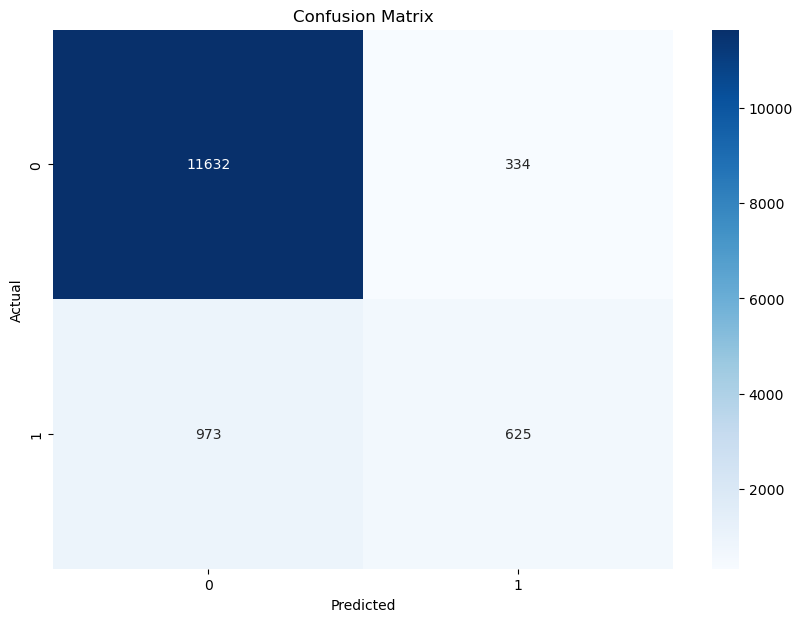

In [33]:
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()